In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [9]:
pwd

'/Users/javingfun/Downloads/Palzkill_Collab'

In [13]:
mmgbsa_csv = './mpro_del_docking_output/7UR9_CDD-1845_Docking_MMGBSA_Constraints.csv'
mmgbsa_df = pd.read_csv(mmgbsa_csv)
mmgbsa_df

,Title,docking score,glide energy,glide emodel,SMILES,MMGBSA dG Bind,MMGBSA dG Bind(NS),glide gscore
0,Naphtha_Control,-10.939,-77.108,-128.670,c1cccc(c12)cncc2-c(n3CCCC(=O)NC)nc(c34)cccc4C(...,-89.00,-91.33,-10.940
1,Trifluoro_Control,-10.756,-73.166,-121.447,c1cccc(c12)cncc2-c(n3CCCC(=O)NC)nc(c34)cccc4C(...,-81.00,-84.16,-10.757
2,3-delta-enelactam,-10.476,-70.186,-111.510,CNC(=O)CCCn1c(-c2cc(=O)[nH]cc2)nc(c13)cccc3C(=...,-78.01,-81.49,-10.476
3,4-gamma-enelactam,-9.320,-67.140,-103.965,CNC(=O)CCCn1c(C2=NC(=O)C=C2)nc(c13)cccc3C(=O)N...,-77.77,-79.80,-9.320
4,3-delta-lactam-S,-10.799,-68.165,-105.332,CNC(=O)CCCn1c(-c2cc(=O)[nH]cc2)nc(c13)cccc3C(=...,-71.85,-78.19,-10.799
5,2-gamma-lactam-R,-7.745,-63.186,-83.356,CNC(=O)CCCn1c([C@H](C2=O)CCN2)nc(c13)cccc3C(=O...,-69.71,-75.97,-7.745
6,5-delta-enelactam,-9.743,-67.771,-105.790,CNC(=O)CCCn1c(-c2cccc(=O)[nH]2)nc(c13)cccc3C(=...,-71.65,-75.35,-9.743
7,2-methyl-delta-enelactam,-7.355,-69.825,-91.007,CNC(=O)CCCn1c(Cc2c(=O)[nH]ccc2)nc(c13)cccc3C(=...,-63.08,-75.18,-7.355
8,2-methyl-delta-enelactam-R,-10.192,-69.315,-110.570,CNC(=O)CCCn1c(Cc2c(=O)[nH]ccc2)nc(c13)cccc3C(=...,-67.02,-74.76,-10.192
9,3-gamma-enelactam,-9.821,-65.390,-98.908,CNC(=O)CCCn1c(C2=CC(=O)N=C2)nc(c13)cccc3C(=O)N...,-70.00,-74.56,-9.821


In [15]:
#Control compounds (native ligands)
control_df = mmgbsa_df[mmgbsa_df["Title"].str.contains("Control")]

#Control Glide score (from Glide SP)
trifluoro_control_ge = float(control_df.loc[control_df["Title"].str.contains("Trifluoro")]["glide energy"])
naphtha_control_ge = float(control_df.loc[control_df["Title"].str.contains("Naphtha")]["glide energy"])
lactam_control_ge = float(control_df.loc[control_df["Title"].str.contains("11a")]["glide energy"])

#Control Docking score (from Glide SP)
trifluoro_control_ds = float(control_df.loc[control_df["Title"].str.contains("Trifluoro")]["docking score"])
naphtha_control_ds = float(control_df.loc[control_df["Title"].str.contains("Naphtha")]["docking score"])
lactam_control_ds = float(control_df.loc[control_df["Title"].str.contains("11a")]["docking score"])

#Control MMGBSA scores
trifluoro_control_mmgbsa = float(control_df.loc[control_df["Title"].str.contains("Trifluoro")]["MMGBSA dG Bind"])
naphtha_control_mmgbsa = float(control_df.loc[control_df["Title"].str.contains("Naphtha")]["MMGBSA dG Bind"])
lactam_control_mmgbsa = float(control_df.loc[control_df["Title"].str.contains("11a")]["MMGBSA dG Bind"])

In [22]:
#Function for plotting either ds or mmgbsa for a given df
def plot_df(avidd_df,energy,plot_color):
    
    #Final Plot for Glide Energy (Glide Energy)
    if energy == 'ge':
        control = trifluoro_control_ge
        avidd_df = avidd_df.sort_values(by=["glide energy"])

        avidd_df.plot.bar(x="Title",
                          y=["glide energy"],
                          rot=90,
                          color=plot_color,figsize=(12,8),
                         fontsize=18 )

        plt.axhline(control,linestyle="--",color="black",)
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.ylabel("kcal/mol")
        plt.title("Glide Energy Scores")
        plt.legend(("Trifluoro control",'Glide Energy'))
        plt.xlabel("")
        plt.plot()
        
    #Final Plot for Docking Score (Glide Energy)
    elif energy == 'ds':
        control = trifluoro_control_ds
        avidd_df = avidd_df.sort_values(by=["docking score"])

        avidd_df.plot.bar(x="Title",
                          y=["docking score"],
                          rot=90,
                          color=plot_color,figsize=(12,8),
                         fontsize=18)

        plt.axhline(control,linestyle="--",color="black",)
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.ylabel("Score",fontsize=18)
        plt.title("Docking Scores",fontsize=18)
        plt.legend(("Trifluoro control",'Docking Score'))
        plt.xlabel("")
        plt.plot()
        
    #Final Plot for MMGBSA Energy (Binding Energy)    
    elif energy == 'mmgbsa':
        control = trifluoro_control_mmgbsa
        avidd_df = avidd_df.sort_values(by=["MMGBSA dG Bind"])

        avidd_df.plot.bar(x="Title",
                          y=["MMGBSA dG Bind"],
                          rot=90,
                          color=plot_color,
                         figsize=(12,8),
                         fontsize=14)
        
        plt.axhline(control,linestyle="--",color="black",)
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.ylabel("kcal/mol",fontsize=18)
        plt.title("MMGBSA Binding Energy (kcal/mol)",fontsize=18)
        plt.xlabel("")
        plt.legend(("Trifluoro control",'MMGBSA Binding Energy'))
        plt.plot()

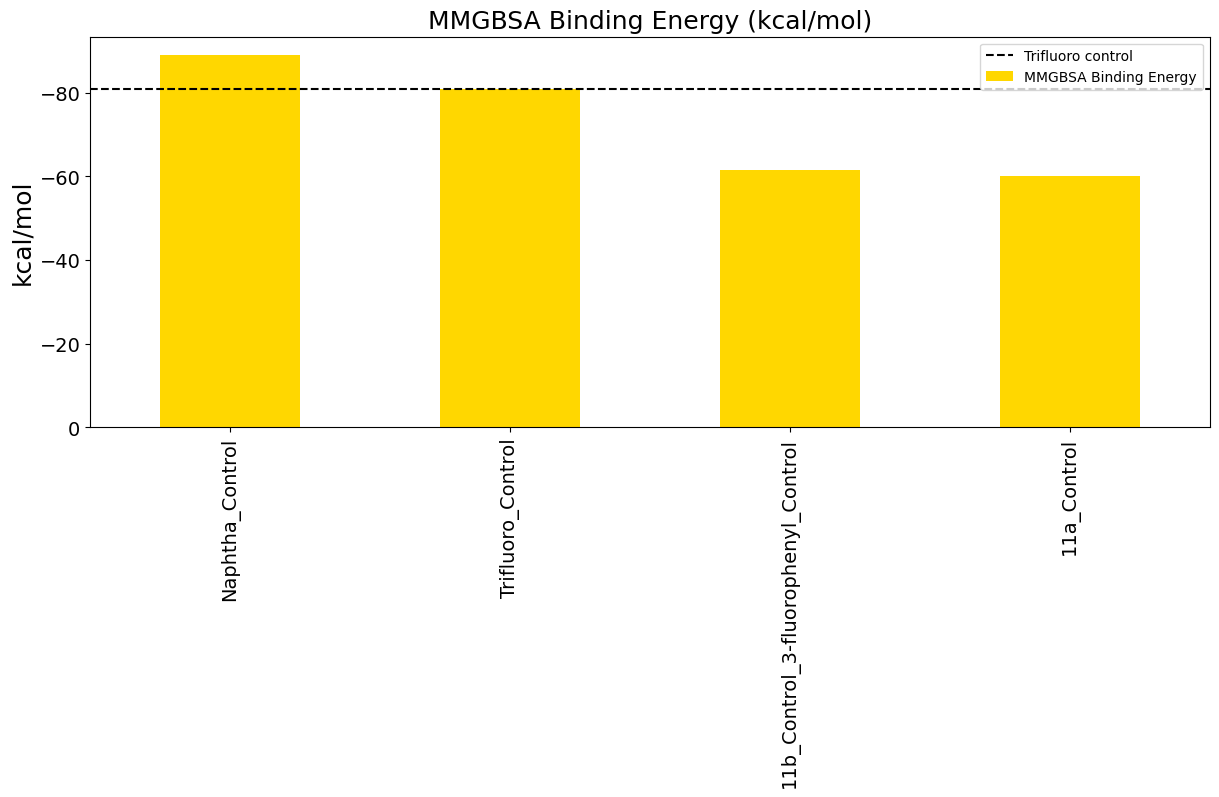

In [23]:
#Control Compounds
#plot_df(control_df,'ds','gold')
#plot_df(control_df, 'ge','gold')
plot_df(control_df,'mmgbsa','gold')

In [24]:
#Original compounds
avidd_list = ['4-gamma-enelactam','2-gamma-lactam-R',
              '2-gamma-lactam-S','4-gamma-lactam-R',
              '4-gamma-lactam-S','2-delta-enelactam',
              '4-delta-enelactam']

avidd_df = mmgbsa_df[mmgbsa_df["Title"].isin(avidd_list)]

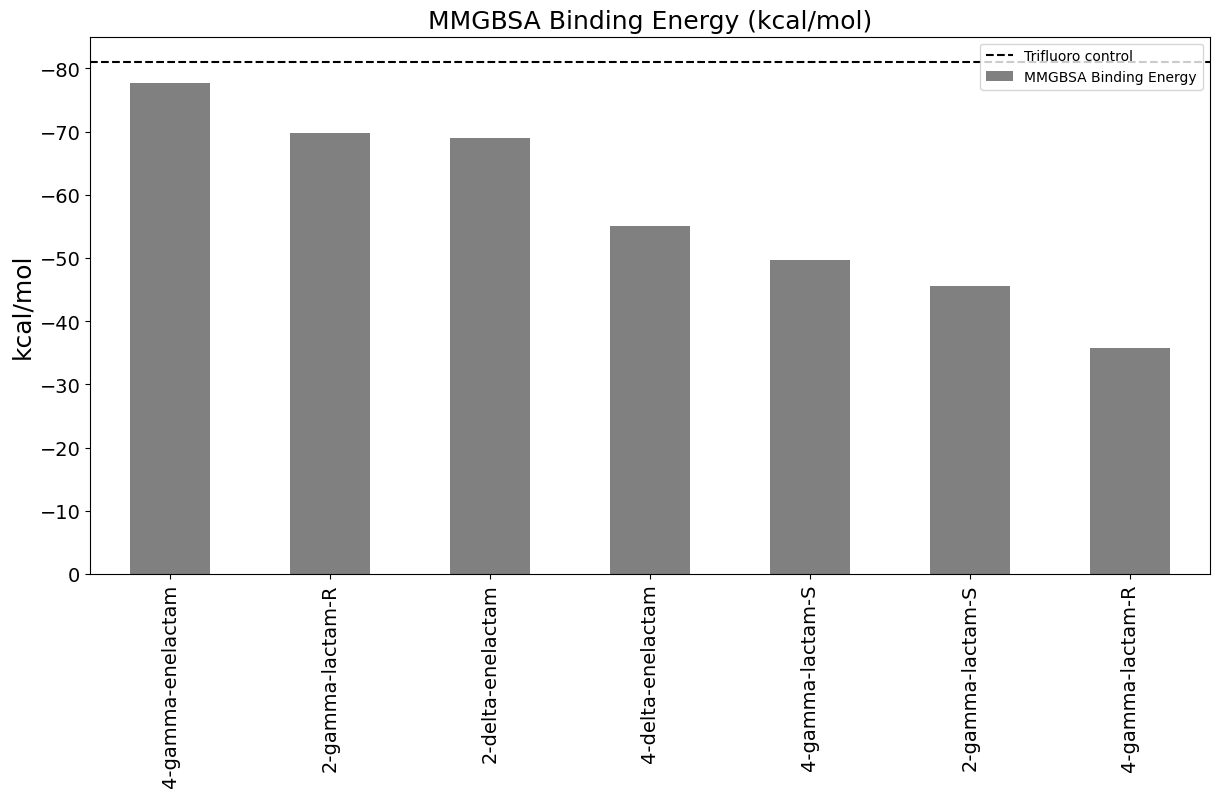

In [25]:
#plot avidd compounds(avidd compounds,'ds')
#plot_df(avidd_df, 'ge',"gray")
avidd_mmgbsa_plot = plot_df(avidd_df,'mmgbsa',"gray")

[]

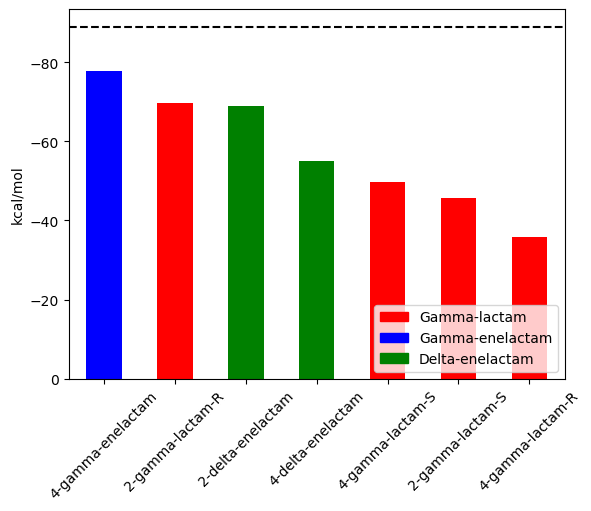

In [26]:
#plot_df(avidd_df,'ds')
#plot_df(avidd_df, 'ge','gray')
#plot_df(avidd_df,'mmgbsa','gray')

colors = {"gamma-lactam": 'red',
         "gamma-enelactam": 'blue',
         "delta-enelactam": 'green',
          "delta-lactam": 'pink',
         "Control": 'gold'}

categorical_variable = ["red" if "gamma-lactam" in i else 
                       "blue" if "gamma-enelactam" in i else 
                       "green" if "delta-enelactam" in i else
                        "pink" if "delta-lactam" in i else
                        "gold" if "Control" in i else "black" for i in avidd_df["Title"]]

#ax = avidd_df.plot.bar(x="Title",y='glide energy',color = categorical_variable,rot=45)
ax = avidd_df.plot.bar(x="Title",y='MMGBSA dG Bind',color = categorical_variable,rot=45)

legend_handles = [
    mpatches.Patch(color=colors['gamma-lactam'], label="Gamma-lactam"),
    mpatches.Patch(color=colors['gamma-enelactam'], label="Gamma-enelactam"),
    mpatches.Patch(color=colors['delta-enelactam'], label="Delta-enelactam"),
]

#plt.legend(("Trifluoro control (-51.68 kcal/mol)"))
ax.legend(handles=legend_handles,loc='lower right')
plt.axhline(naphtha_control_mmgbsa,linestyle="--",color="black")


plt.xlabel("")
plt.ylabel("kcal/mol")
plt.gca().invert_yaxis()
plt.plot()

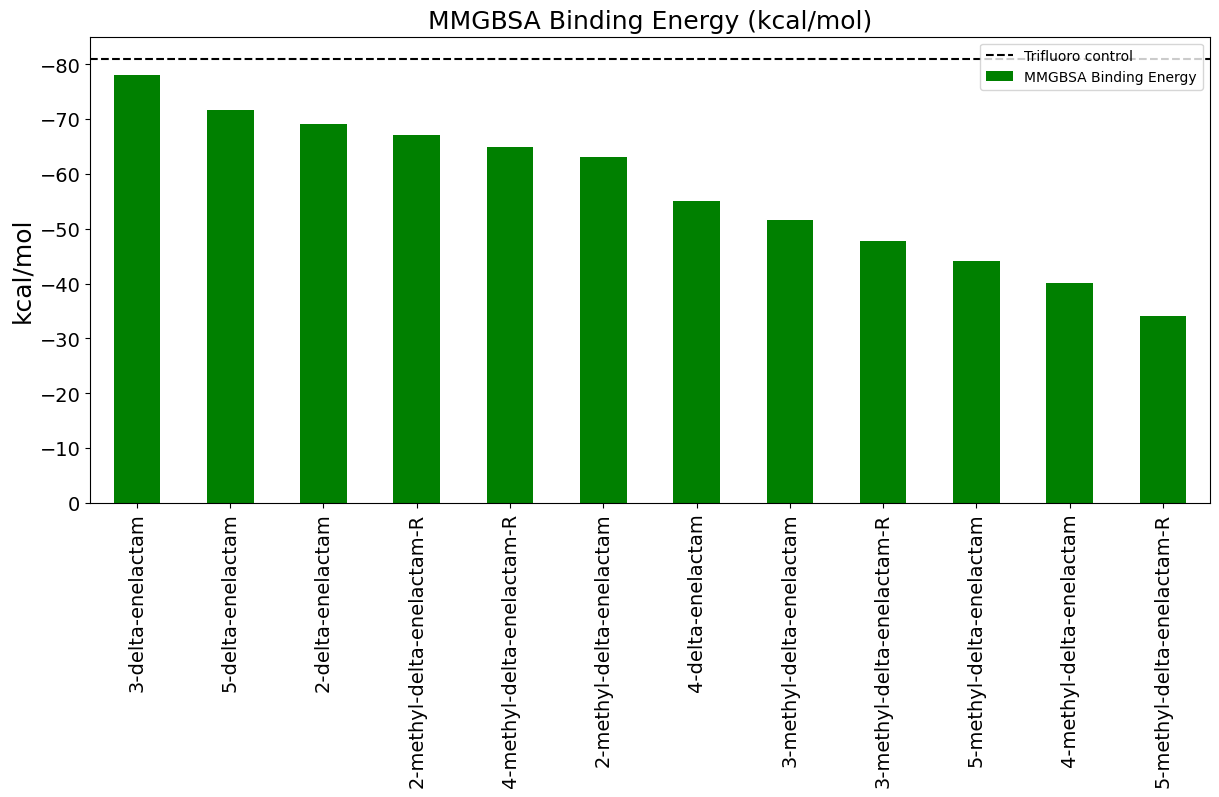

In [27]:
#delta-enelactam  (2,3,4,5)
delta_enelactam = mmgbsa_df[mmgbsa_df["Title"].str.contains("delta-enelactam")]
delta_enelactam

#plot_df(delta_enelactam,'ds')
#plot_df(delta_enelactam, 'ge',"green")
plot_df(delta_enelactam,'mmgbsa',"green")

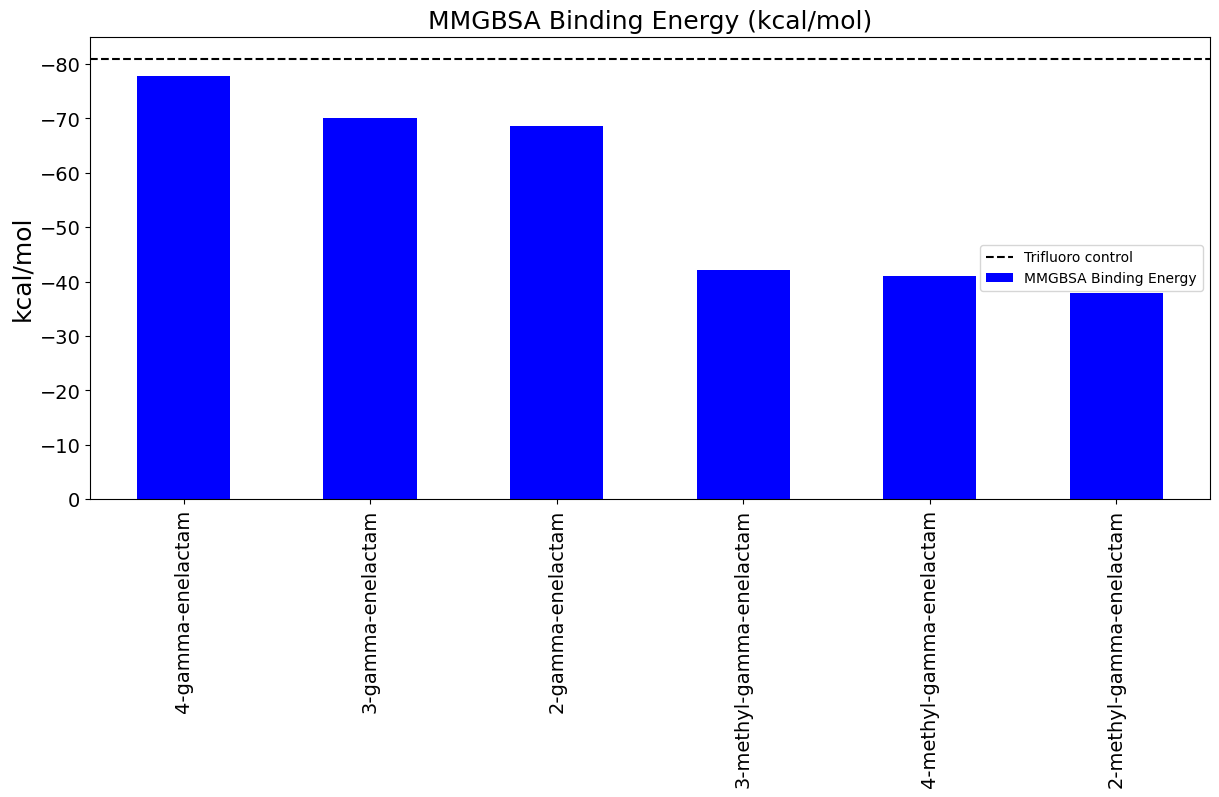

In [28]:
#gamma-enelactam  (2,3,4)
gamma_enelactam = mmgbsa_df[mmgbsa_df["Title"].str.contains("gamma-enelactam")]
gamma_enelactam

#plot_df(gamma_enelactam,'ds')
#plot_df(gamma_enelactam,'ge',"blue")
plot_df(gamma_enelactam,'mmgbsa',"blue")

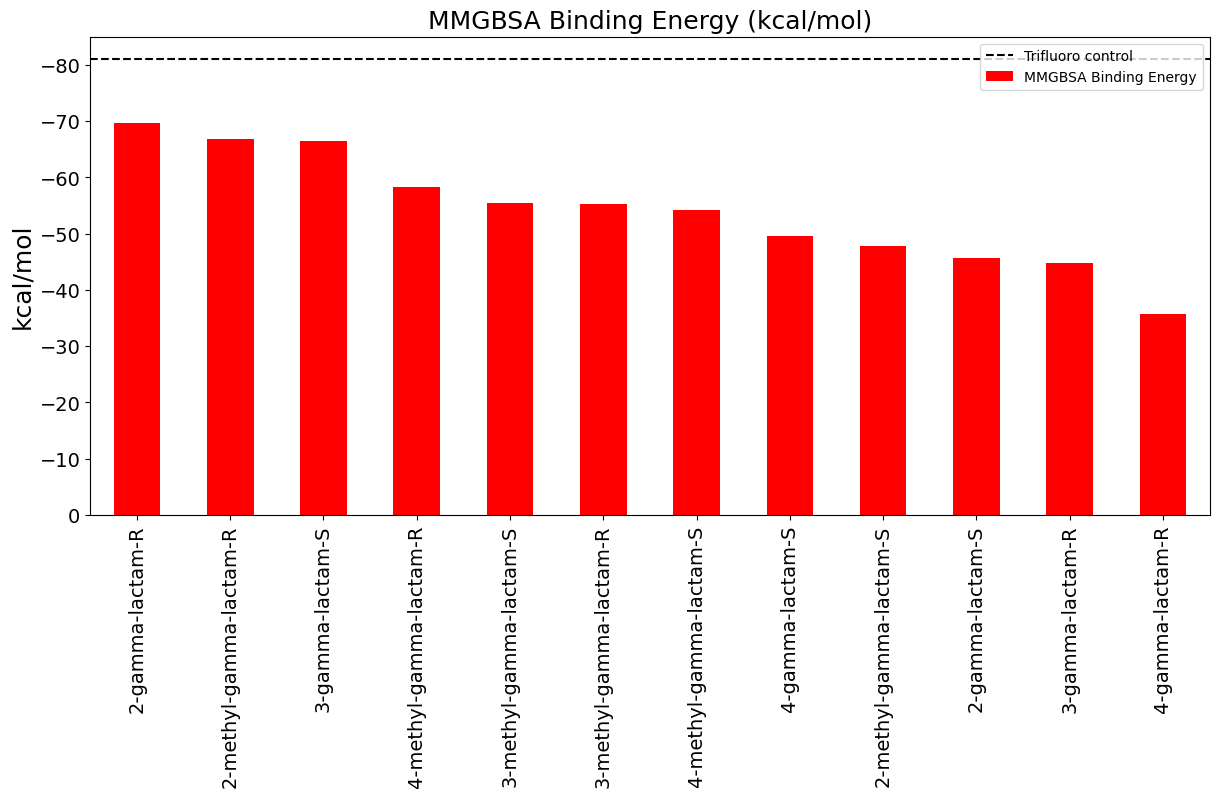

In [29]:
#gamma-lactam    (2,3,4)
gamma_lactam = mmgbsa_df[mmgbsa_df["Title"].str.contains("gamma-lactam")]
gamma_enelactam

#plot_df(gamma_lactam,'ds')
plot_df(gamma_lactam,'mmgbsa','red')
#plot_df(gamma_lactam,'ge','red')

[]

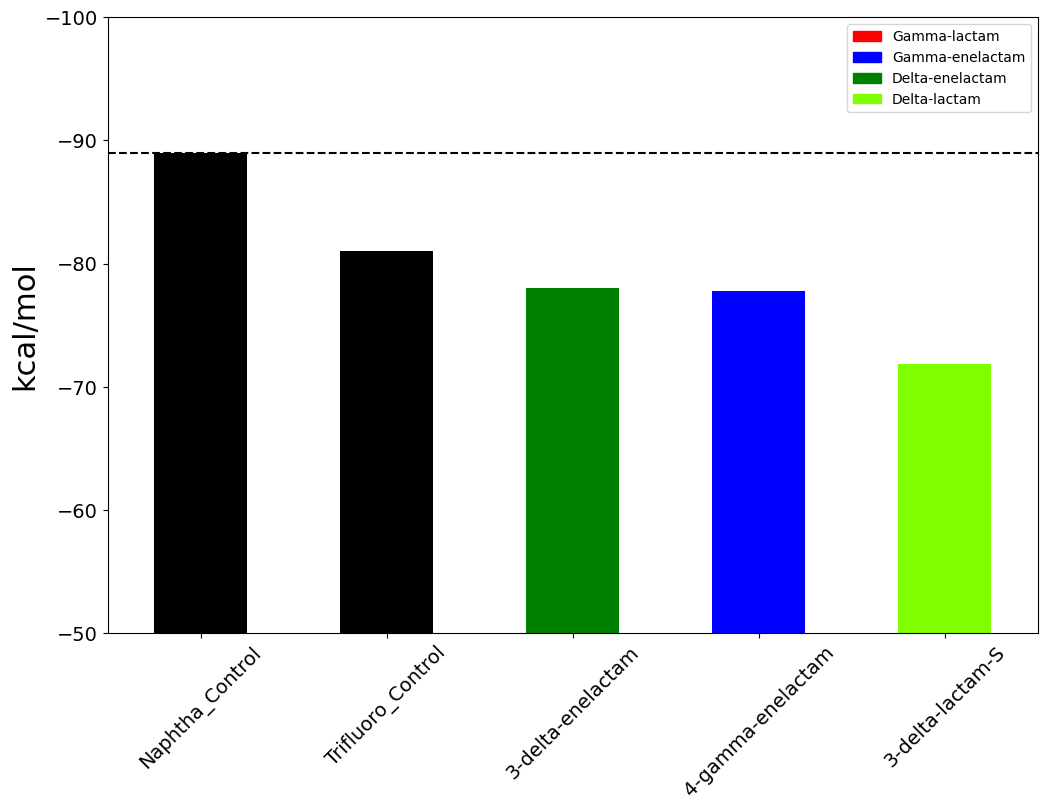

In [31]:
#top 5 compounds
top_emodel = mmgbsa_df.sort_values(by=["MMGBSA dG Bind"]).head(5)

colors = {"gamma-lactam": 'red',
         "gamma-enelactam": 'blue',
         "delta-enelactam": 'green',
          "delta-lactam": 'chartreuse',
         "Control": 'black'}

categorical_variable = ["red" if "gamma-lactam" in i else 
                       "blue" if "gamma-enelactam" in i else 
                       "green" if "delta-enelactam" in i else 
                        "chartreuse" if "delta-lactam" in i else
                        "black" if "Control" in i else "black" for i in top_emodel["Title"]]


ax = top_emodel.plot.bar(x="Title",
                         y='MMGBSA dG Bind',
                         color = categorical_variable,
                         rot=45,
                        figsize=(12,8),
                        fontsize=14)
plt.axhline(naphtha_control_mmgbsa,linestyle="--",color="black",)

legend_handles = [
    mpatches.Patch(color=colors['gamma-lactam'], label="Gamma-lactam"),
    mpatches.Patch(color=colors['gamma-enelactam'], label="Gamma-enelactam"),
    mpatches.Patch(color=colors['delta-enelactam'], label="Delta-enelactam"),
    mpatches.Patch(color=colors['delta-lactam'], label="Delta-lactam")
    #mpatches.Patch(color=colors['Control'], label="Control"),
]

ax.legend(handles=legend_handles,loc='upper right')
plt.xlabel("")
plt.gca().invert_yaxis()
plt.ylabel("kcal/mol",fontsize=22)
plt.ylim(-50,-100)
plt.plot()

[]

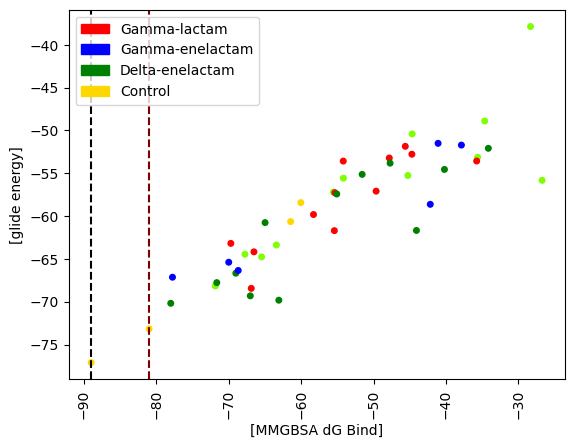

In [34]:
colors = {"gamma-lactam": 'red',
         "gamma-enelactam": 'blue',
         "delta-enelactam": 'green',
          "delta-lactam": 'chartreuse',
         "Control": 'gold'}

categorical_variable = ["red" if "gamma-lactam" in i else 
                       "blue" if "gamma-enelactam" in i else 
                       "green" if "delta-enelactam" in i else 
                        "chartreuse" if "delta-lactam" in i else
                        "gold" if "Control" in i else "black" for i in mmgbsa_df["Title"]]


ax = mmgbsa_df.plot.scatter(x=["MMGBSA dG Bind"], 
                            y=["glide energy"], 
                            c=categorical_variable, 
                            rot=90,
                            s=16)

#plt.axhline(trifluoro_control_ge,linestyle="--",color="grey")
plt.axvline(trifluoro_control_mmgbsa,linestyle="--",color="maroon")
plt.axvline(naphtha_control_mmgbsa,linestyle="--",color="black")

legend_handles = [
    mpatches.Patch(color=colors['gamma-lactam'], label="Gamma-lactam"),
    mpatches.Patch(color=colors['gamma-enelactam'], label="Gamma-enelactam"),
    mpatches.Patch(color=colors['delta-enelactam'], label="Delta-enelactam"),
    mpatches.Patch(color=colors['Control'], label="Control"),
]

ax.legend(handles=legend_handles,loc='upper left')
plt.plot()

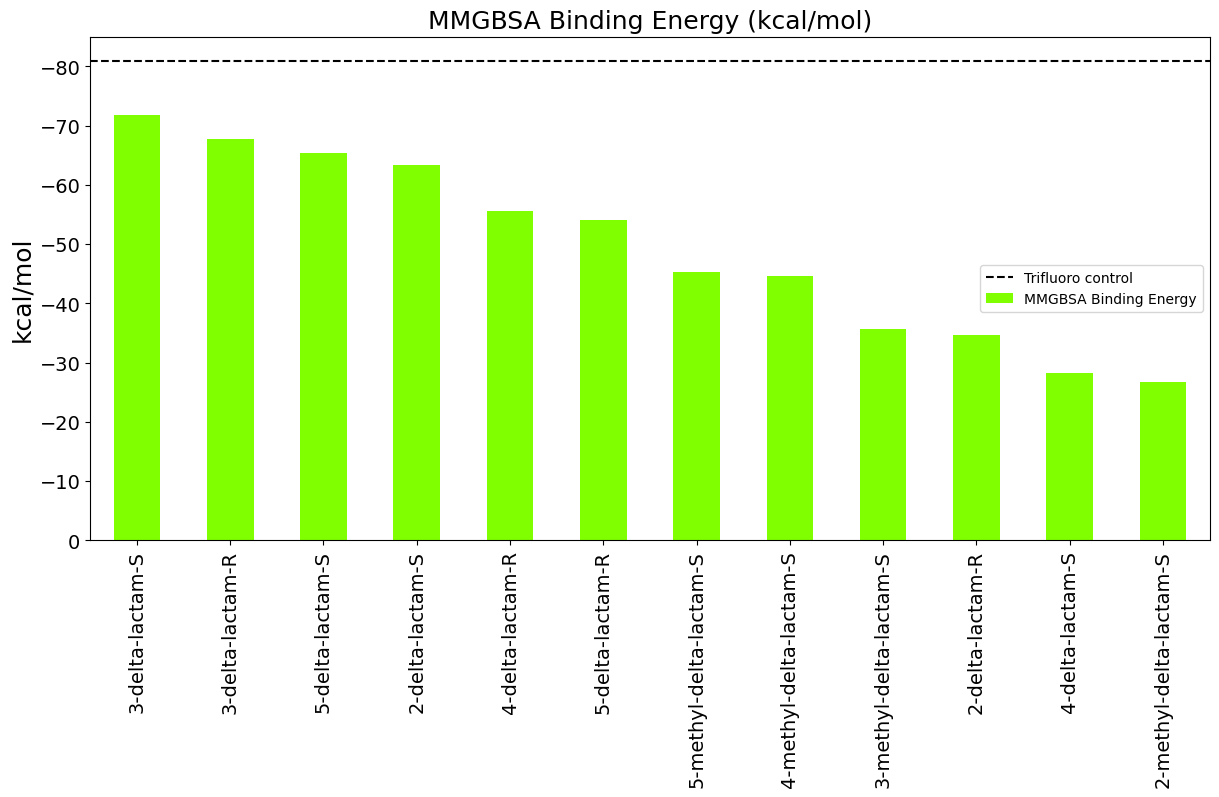

In [37]:
#delta-enelactam  (2,3,4,5)
delta_lactam = mmgbsa_df[mmgbsa_df["Title"].str.contains("delta-lactam")]
delta_lactam

#plot_df(delta_enelactam,'ds')
#plot_df(delta_lactam, 'ge',"violet")
plot_df(delta_lactam,'mmgbsa',"chartreuse")

[]

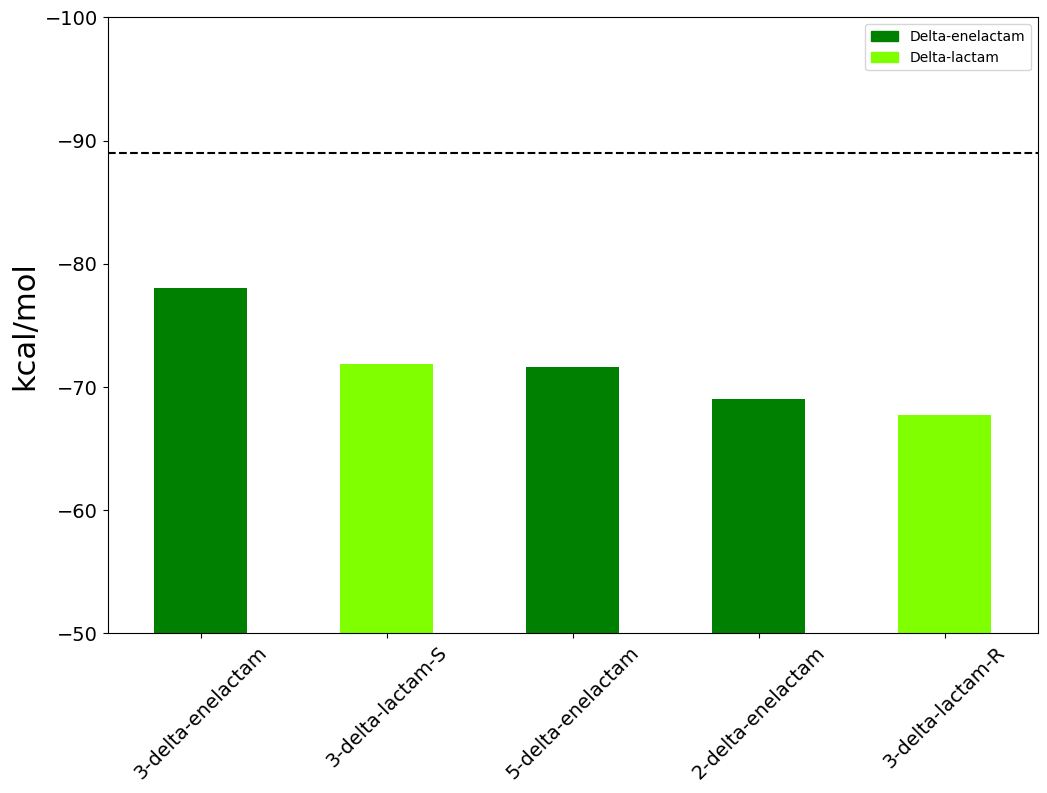

In [38]:
#top 5 delta enelactam + top 5 delta lactam

top_delta = [delta_lactam.sort_values(by=["MMGBSA dG Bind"]).head(5),
            delta_enelactam.sort_values(by=["MMGBSA dG Bind"]).head(5)]

top_delta_df = pd.concat(top_delta).sort_values(by=["MMGBSA dG Bind"]).head(5)

colors = {"gamma-lactam": 'red',
         "gamma-enelactam": 'blue',
         "delta-enelactam": 'green',
          "delta-lactam": 'chartreuse',
         "Control": 'black'}

categorical_variable = ["red" if "gamma-lactam" in i else 
                       "blue" if "gamma-enelactam" in i else 
                       "green" if "delta-enelactam" in i else 
                        "chartreuse" if "delta-lactam" in i else
                        "black" if "Control" in i else "black" for i in top_delta_df["Title"]]


ax = top_delta_df.plot.bar(x="Title",
                         y='MMGBSA dG Bind',
                         color = categorical_variable,
                         rot=45,
                        figsize=(12,8),
                        fontsize=14)
plt.axhline(naphtha_control_mmgbsa,linestyle="--",color="black",)

legend_handles = [
    #mpatches.Patch(color=colors['gamma-lactam'], label="Gamma-lactam"),
    #mpatches.Patch(color=colors['gamma-enelactam'], label="Gamma-enelactam"),
    mpatches.Patch(color=colors['delta-enelactam'], label="Delta-enelactam"),
    mpatches.Patch(color=colors['delta-lactam'], label="Delta-lactam"),
    #mpatches.Patch(color=colors['Control'], label="Control"),
]

ax.legend(handles=legend_handles,loc='upper right')
plt.xlabel("")
plt.gca().invert_yaxis()
plt.ylabel("kcal/mol",fontsize=22)
plt.ylim(-50,-100)
plt.plot()

[]

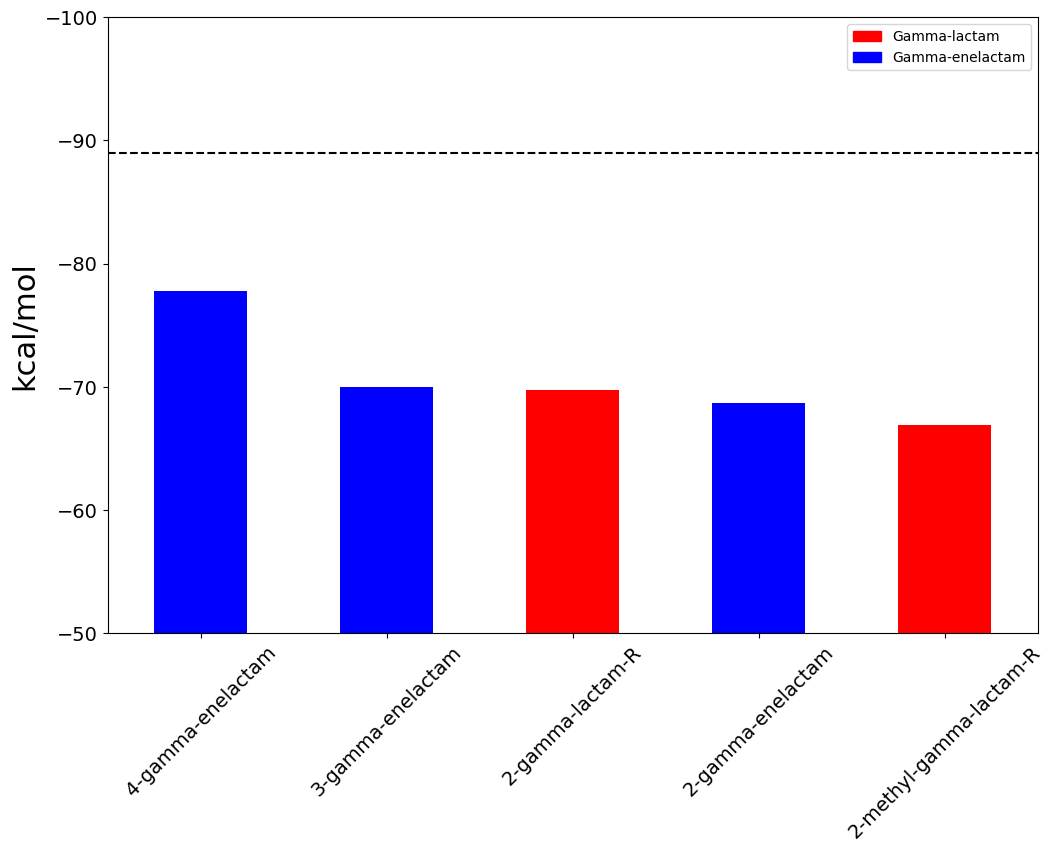

In [39]:
#top 5 gamma enelactam vs. top 5 delta lactam
top_gamma = [gamma_lactam.sort_values(by=["MMGBSA dG Bind"]).head(5),
            gamma_enelactam.sort_values(by=["MMGBSA dG Bind"]).head(5)]

top_gamma_df = pd.concat(top_gamma).sort_values(by=["MMGBSA dG Bind"]).head(5)

colors = {"gamma-lactam": 'red',
         "gamma-enelactam": 'blue',
         "delta-enelactam": 'green',
          "delta-lactam": 'chartreuse',
         "Control": 'black'}

categorical_variable = ["red" if "gamma-lactam" in i else 
                       "blue" if "gamma-enelactam" in i else 
                       "green" if "delta-enelactam" in i else 
                        "chartreuse" if "delta-lactam" in i else
                        "black" if "Control" in i else "black" for i in top_gamma_df["Title"]]


ax = top_gamma_df.plot.bar(x="Title",
                         y='MMGBSA dG Bind',
                         color = categorical_variable,
                         rot=45,
                        figsize=(12,8),
                        fontsize=14)
plt.axhline(naphtha_control_mmgbsa,linestyle="--",color="black",)

legend_handles = [
    mpatches.Patch(color=colors['gamma-lactam'], label="Gamma-lactam"),
    mpatches.Patch(color=colors['gamma-enelactam'], label="Gamma-enelactam"),
    #mpatches.Patch(color=colors['delta-enelactam'], label="Delta-enelactam"),
    #patches.Patch(color=colors['delta-lactam'], label="Delta-enelactam"),
    #mpatches.Patch(color=colors['Control'], label="Control"),
]

ax.legend(handles=legend_handles,loc='upper right')
plt.xlabel("")
plt.gca().invert_yaxis()
plt.ylabel("kcal/mol",fontsize=22)
plt.ylim(-50,-100)
plt.plot()